# **Goal**
The goal in this analysis is to gather information about movies and shows, such as the 'Top 10 Movies with the biggest duration in minutes', 'Top 10 Shows with the biggest amount of seasons', and other types of information, such as the 'Top 10 directors with the biggest amount of movies', to identify certain patterns.

In [19]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../input/netflix_titles.csv')
df.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# First 10 rows

In [20]:
# ---> First 10 rows <--- #
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Information regarding the 'release_year' column

In [21]:
# ---> Showing some numbers related to the 'release_year' column <--- #
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Shape of the dataframe

In [22]:
# ---> Shape of the dataframe <--- #
df.shape

(8807, 12)

# Number of null values

In [23]:
# ---> Number of null values <--- #
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Filling null values with dummy data

In [24]:
# ---> Filling null values with dummy data <--- #
df['director'] = df['director'].fillna(value='Unknown Director')
df['cast'] = df['cast'].fillna(value='Unknown Cast')
df['country'] = df['country'].fillna(value='Unknown Country')
df['date_added'] = df['date_added'].fillna(value='Unknown Date')
df['rating'] = df['rating'].fillna(value='Unknown Rating')
df['duration'] = df['duration'].fillna(value='Unknown Duration')

# Top 10 Countries with the biggest amount of Shows/Movies

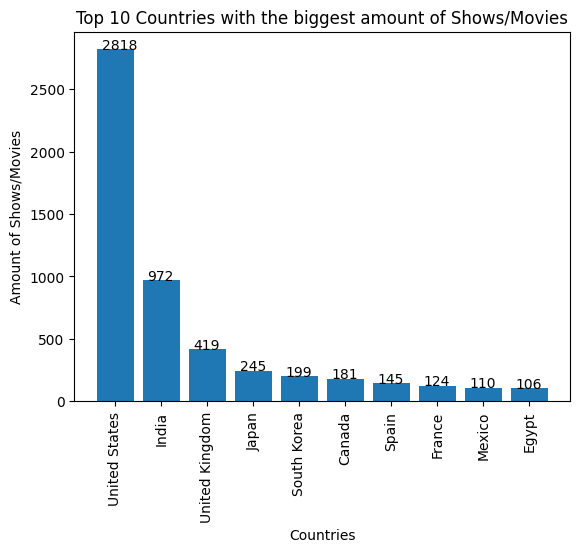

In [25]:
# ---> Bar chart that shows the top 10 countries with the most movies/shows <--- #
movies_shows = df.loc[df['country'] != 'Unknown Country','country'].value_counts().sort_values(ascending=False).head(10).tolist()
movies_shows_countries_names = df.loc[df['country'] != 'Unknown Country','country'].value_counts().head(10).index.tolist()
fig, ax = plt.subplots()
ax.bar(movies_shows_countries_names,movies_shows)
for i in range(len(movies_shows)):
    ax.text(i - 0.3,movies_shows[i],movies_shows[i])
plt.xticks(rotation='vertical')
ax.set_title('Top 10 Countries with the biggest amount of Shows/Movies')
ax.set_xlabel('Countries')
ax.set_ylabel('Amount of Shows/Movies')
plt.show()

# Top 10 Movies with the biggest amount of duration

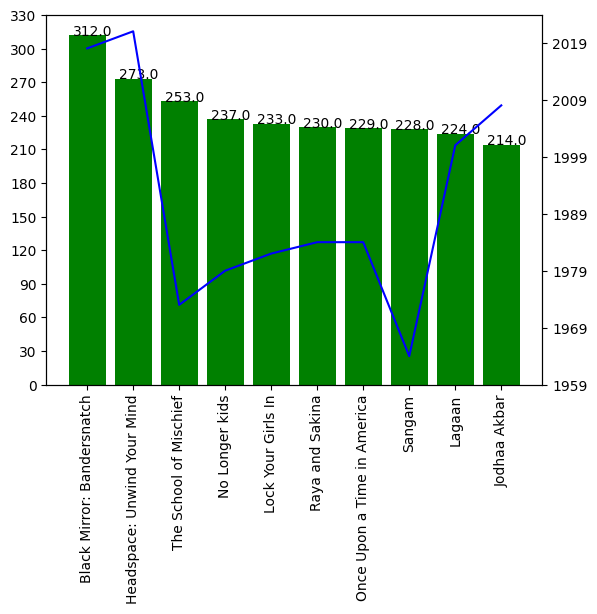

In [26]:
data = df.loc[(df['type'] == 'Movie') & (df['duration'] != 'Unknown Duration'),'duration'].str.replace('min','')
df['movies_duration_in_minutes'] = data.astype(int)
movies = df.loc[(df['type'] == 'Movie') & (df['duration'] != 'Unknown Duration'),['title','movies_duration_in_minutes','release_year']].sort_values('movies_duration_in_minutes',ascending=False)
movies_year = movies.head(10)['release_year'].tolist()
movies_names = movies.head(10)['title'].tolist()
movies_minutes = movies.head(10)['movies_duration_in_minutes'].tolist()

fig, ax = plt.subplots()
for i in range(len(movies_minutes)):
    ax.text(i - 0.3,movies_minutes[i], movies_minutes[i])
ax.bar(movies_names,movies_minutes,color='g')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,max(movies_minutes) + 20,30))
ax2 = ax.twinx()
ax2.plot(movies_names,movies_year,color='b')
ax2.set_yticks(np.arange(min(movies_year) - 5,max(movies_year) + 5,10))
plt.show()

# Bar chart with the Top 10 Shows with the biggest amount of Seasons


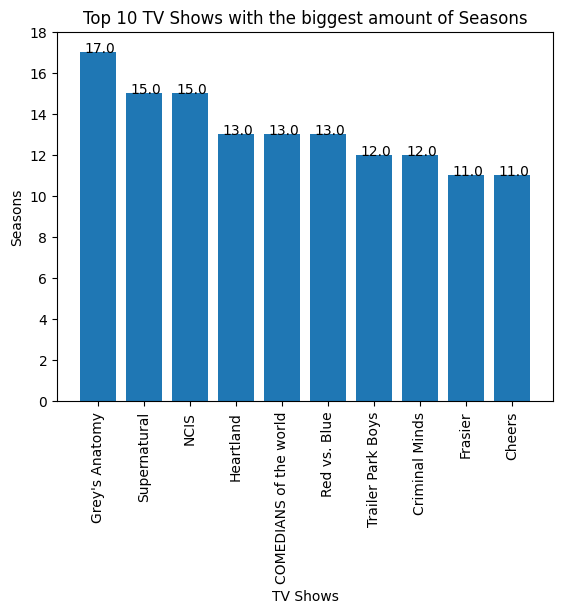

In [27]:
data = df.loc[(df['type'] == 'TV Show') & (df['duration'] != 'Unknown Duration'),'duration'].str.replace('[a-zA-Z]','',regex=True)
df['shows_duration_in_seasons'] = data.astype(int)
shows = df.loc[(df['type'] == 'TV Show') & (df['duration'] != 'Unknown Duration'),['title','shows_duration_in_seasons']].sort_values('shows_duration_in_seasons',ascending=False)
shows_names = shows.head(10)['title'].tolist()
shows_duration = shows.head(10)['shows_duration_in_seasons'].tolist()

fig, ax = plt.subplots()
for i in range(len(shows_duration)):
    ax.text(i - 0.3, shows_duration[i], shows_duration[i])
ax.bar(shows_names,shows_duration)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,max(shows_duration) +2,2))
ax.set_title('Top 10 TV Shows with the biggest amount of Seasons')
ax.set_xlabel('TV Shows')
ax.set_ylabel('Seasons')
plt.show()

# Bar Chart with the Top 10 Movies with Sci-Fi tag with the biggest amount of duration

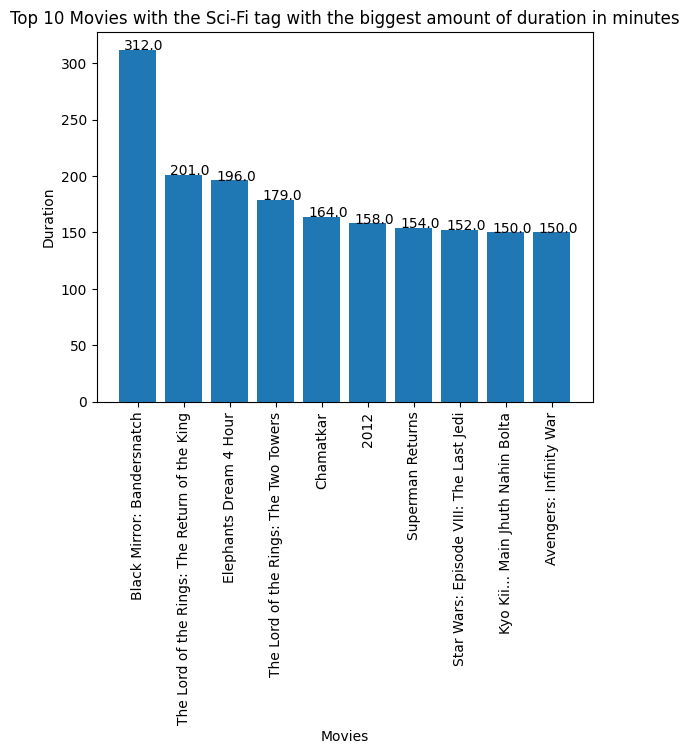

In [28]:
movies = df.loc[(df['listed_in'].str.contains('Sci-Fi')) & (df['type'] == 'Movie') & (df['duration'] != 'Unknown Duration'),['title','movies_duration_in_minutes']].sort_values('movies_duration_in_minutes',ascending=False)
movies_sorted = movies.head(10)['title'].tolist()
movies_duration = movies.head(10)['movies_duration_in_minutes'].tolist()

fig, ax = plt.subplots()
ax.bar(movies_sorted, movies_duration)
ax.set_title('Top 10 Movies with the Sci-Fi tag with the biggest amount of duration in minutes')
for i in range(len(movies_duration)):
    ax.text(i - 0.3, movies_duration[i], movies_duration[i])
plt.xticks(rotation='vertical')
ax.set_xlabel('Movies')
ax.set_ylabel('Duration')
plt.show()


# Directors with the biggest amount of movies

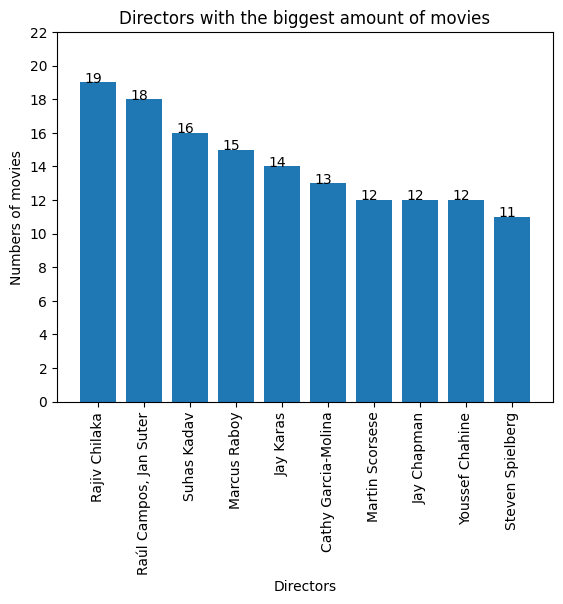

In [29]:
directors = df.loc[(df['director'] != 'Unknown Director') & (df['type'] == 'Movie'), ['director']].value_counts()
directors_numbers_sorted = directors.sort_values(ascending=False).head(10).tolist()
directors_names_sorted = directors.sort_values(ascending=False).head(10).index.get_level_values(0).tolist()
fig, ax = plt.subplots()
ax.bar(directors_names_sorted, directors_numbers_sorted)
for i in range(len(directors_numbers_sorted)):
    ax.text(i - 0.3, directors_numbers_sorted[i], directors_numbers_sorted[i])
plt.xticks(rotation=90)
plt.yticks(np.arange(0,max(directors_numbers_sorted)+4,2))
ax.set_title("Directors with the biggest amount of movies")
ax.set_xlabel('Directors')
ax.set_ylabel('Numbers of movies')
plt.show()

# Oldest TV Shows

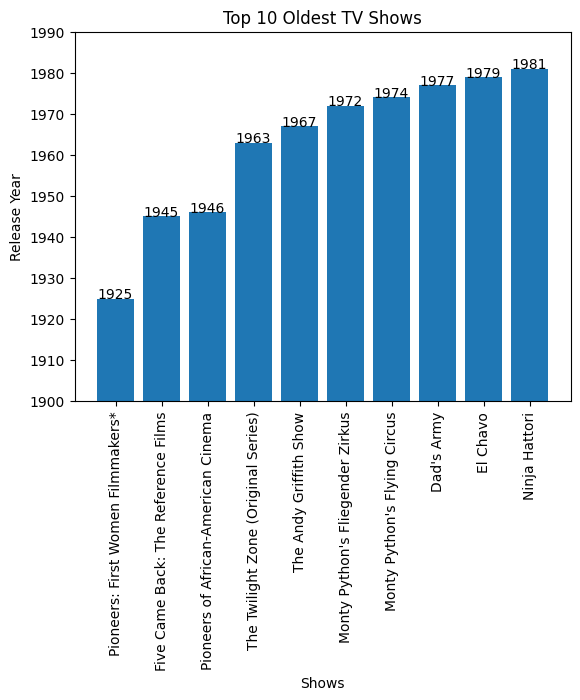

In [35]:
shows_years = df.loc[(df['type'] == 'TV Show') & (df['date_added'] != 'Unknown Date'), ['title','release_year']].sort_values('release_year')
shows_years_filtered = shows_years['release_year'].head(10).tolist()
shows_names_filtered = shows_years['title'].head(10).tolist()
fig, ax = plt.subplots()
for i in range(len(shows_years_filtered)):
    ax.text(i - 0.4, shows_years_filtered[i], shows_years_filtered[i])
ax.bar(shows_names_filtered,shows_years_filtered)
plt.xticks(rotation=90)
ax.set_ylim(ymin=1900,ymax=1990)
ax.set_title('Top 10 Oldest TV Shows')
ax.set_xlabel('Shows')
ax.set_ylabel('Release Year')
plt.show()

# Pie chart with amount of unknown directors and known directors

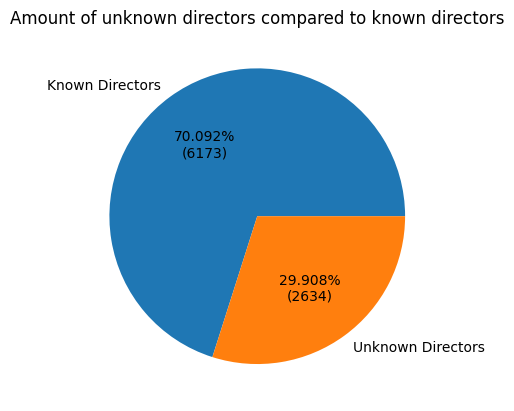

In [31]:
unknown_directors = df.loc[(df['director'] == 'Unknown Director'),'director'].count().tolist()
known_directors = df.loc[df['director'] != 'Unknown Director','director'].count().tolist()
combined = [known_directors, unknown_directors]
fig, ax = plt.subplots()

total = sum(combined)
def myformat(x):
    return '{:.3f}%\n({:.0f})'.format(x,total*x/100)
ax.pie(combined,labels=['Known Directors','Unknown Directors'], autopct=myformat)
ax.set_title("Amount of unknown directors compared to known directors")

plt.show()

# Pie chart with amount of Shows to Movies

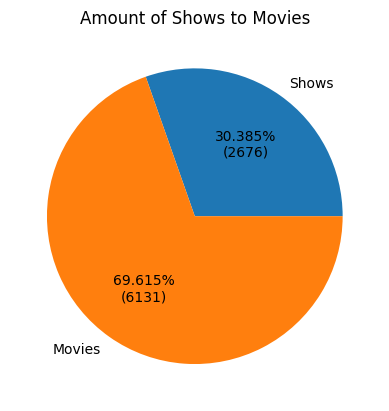

In [32]:
movies = df.loc[df['type'] == 'Movie','title'].count().tolist()
shows = df.loc[df['type'] == 'TV Show','title'].count().tolist()
combined = [shows, movies]

fig, ax = plt.subplots()

total = sum(combined)
def myformat(x):
    return '{:.3f}%\n({:.0f})'.format(x,total*x/100)

ax.pie(combined,labels=['Shows', 'Movies'],autopct=myformat)
ax.set_title('Amount of Shows to Movies')

plt.show()

# **Conclusion**
In this dataset we can conclude:
1. The US has more Shows/Movies than any other country.
2. 'Black Mirror: Bandersnatch' is the movie with the biggest duration in this dataset.
3. 'Grey's Anatomy' is the TV Show with the biggest amount of seasons in this dataset.
4. Rajiv Chilaka has directed the biggest amount of movies in this dataset.
5. The oldest TV Show in this dataset is 'Pioneers: First Women Filmmakers*', coming from 1925.
6. 70% of the directors from this dataset are identified(their names are listed) instead of being marked as an 'Unknown Director'.
7. Almost 70% of the titles in this dataset are Movies.